## Load and Inspect Data

### Subtask:
Load the `test.csv` file into a pandas DataFrame and perform an initial inspection to understand its structure, column names, data types, and identify any missing values or categorical features.


In [ ]:
import pandas as pd

# Load the test.csv file into a pandas DataFrame
df = pd.read_csv('/content/test.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Display a summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics of the numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
         id player_id  login_count_1  login_count_2  login_count_3  \
0  ANS00001   P011753      31.222232      41.790417      28.048736   
1  ANS00002   P010021      61.358999      49.209284            NaN   
2  ANS00003   P006725      24.763478      37.723228      26.879628   
3  ANS00004   P018170      82.100747      74.862388      73.520927   
4  ANS00005   P003027      50.901216      70.636572      55.606357   

   login_count_4  login_lat_1  login_lon_1  login_lat_2  login_lon_2  ...  \
0            NaN   -17.074035   127.285635   -17.554811   126.865553  ...   
1            NaN    48.430879    25.555743    48.708993    26.733951  ...   
2      32.503285     8.252684    40.788695     8.346856    40.688039  ...   
3      83.495309   -28.728293   178.990465   -29.104994   178.810800  ...   
4      68.179388   -46.833704   167.886402   -47.372141   166.767058  ...   

   guild_changes_1  guild_changes_2  guild_changes_3  guild_changes_4  \
0           

## Visualize Data Distribution Before Preprocessing

### Subtask:
Create histograms for `login_count_1`, `account_age_days`, and `behavior_stability` from `df_processed` (after dropping 'id' and 'player_id' but before imputation and scaling). These visualizations will illustrate the original data distributions and highlight the presence of missing values. Ensure clear titles and legends for all plots. This step will be placed within the preprocessing section.


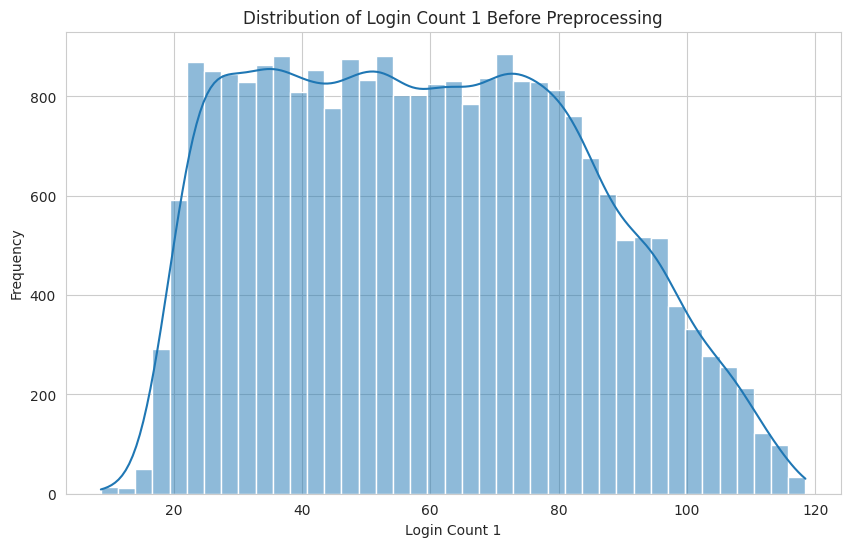

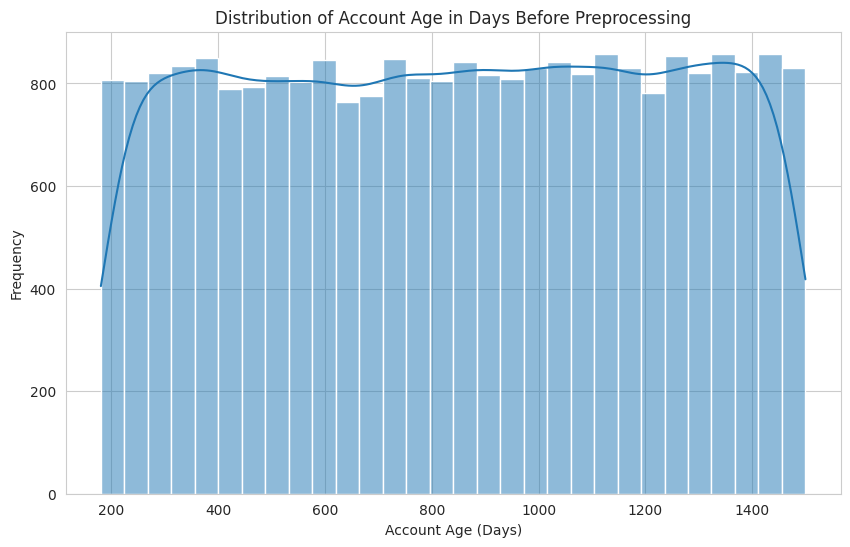

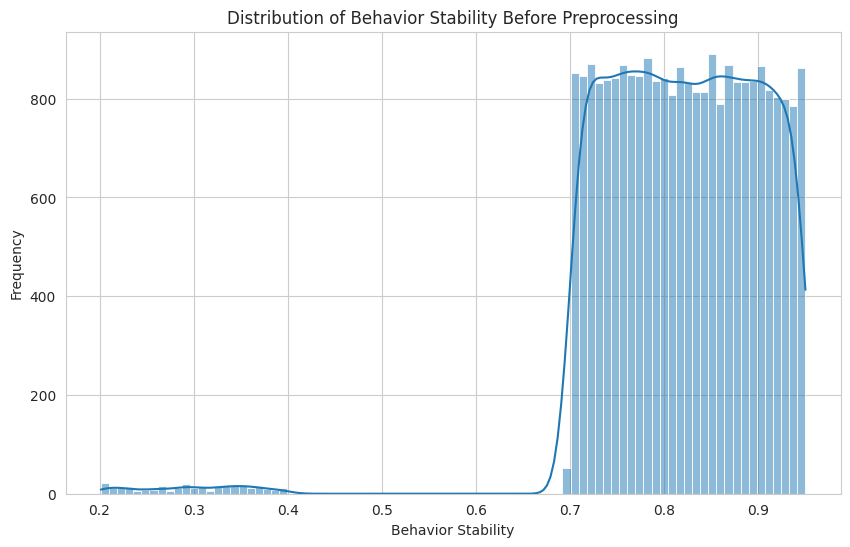

Histograms for login_count_1, account_age_days, and behavior_stability from df_processed generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style('whitegrid')

# Recreate df_processed by dropping 'id' and 'player_id' from the original df
df_processed = df.drop(columns=['id', 'player_id'])

# Create histograms for specified columns from df_processed

# Histogram for login_count_1
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['login_count_1'].dropna(), kde=True)
plt.title('Distribution of Login Count 1 Before Preprocessing')
plt.xlabel('Login Count 1')
plt.ylabel('Frequency')
plt.show()

# Histogram for account_age_days
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['account_age_days'].dropna(), kde=True)
plt.title('Distribution of Account Age in Days Before Preprocessing')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for behavior_stability
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['behavior_stability'].dropna(), kde=True)
plt.title('Distribution of Behavior Stability Before Preprocessing')
plt.xlabel('Behavior Stability')
plt.ylabel('Frequency')
plt.show()

print("Histograms for login_count_1, account_age_days, and behavior_stability from df_processed generated.")

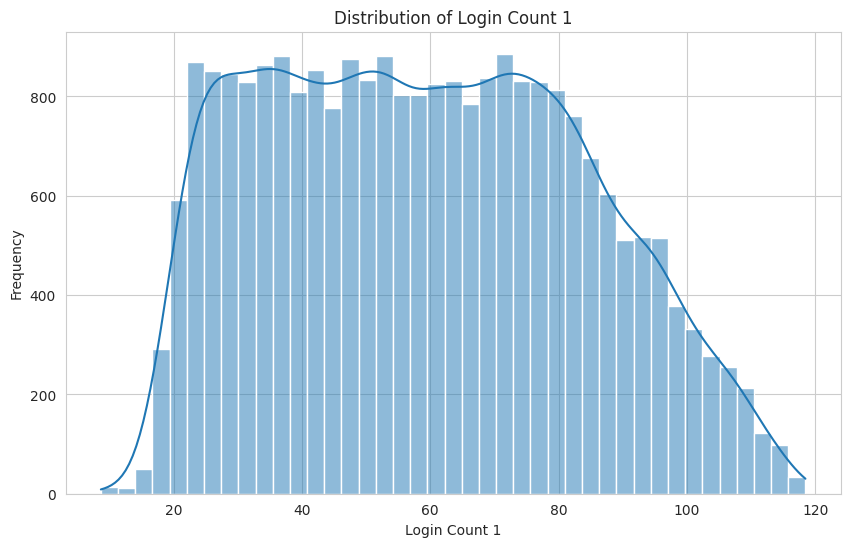

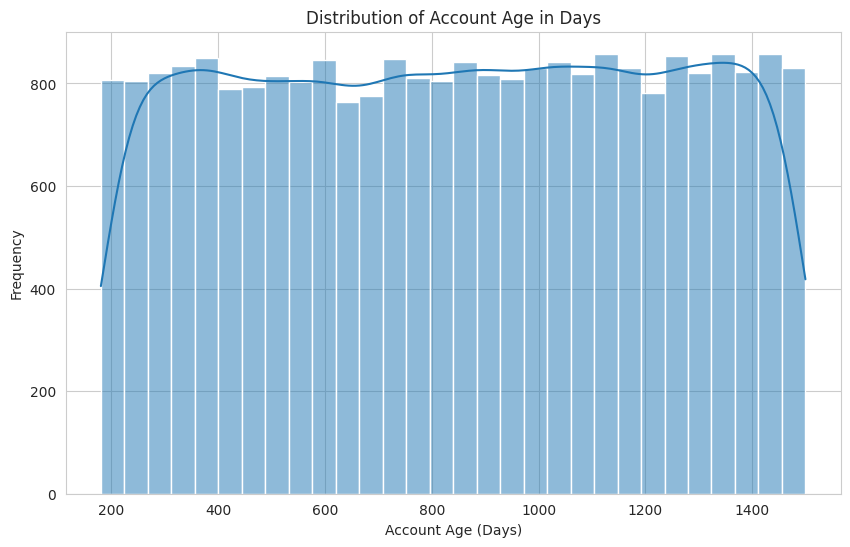

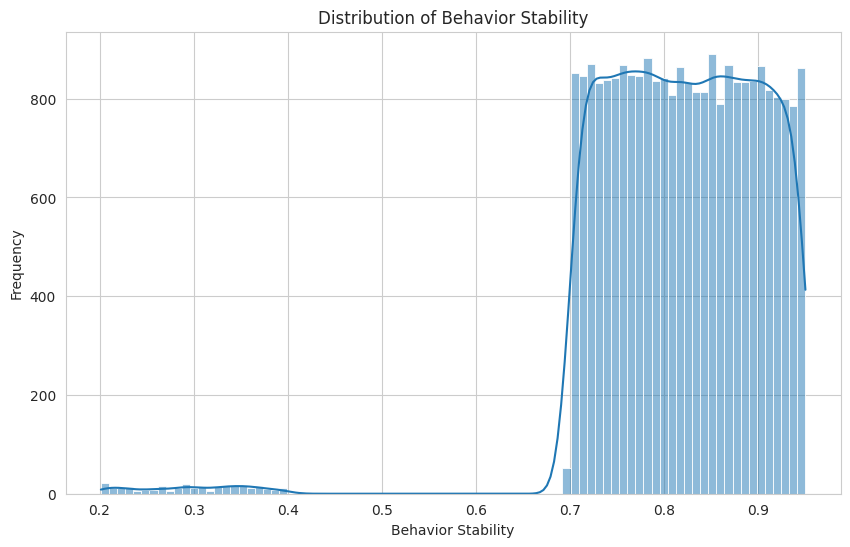

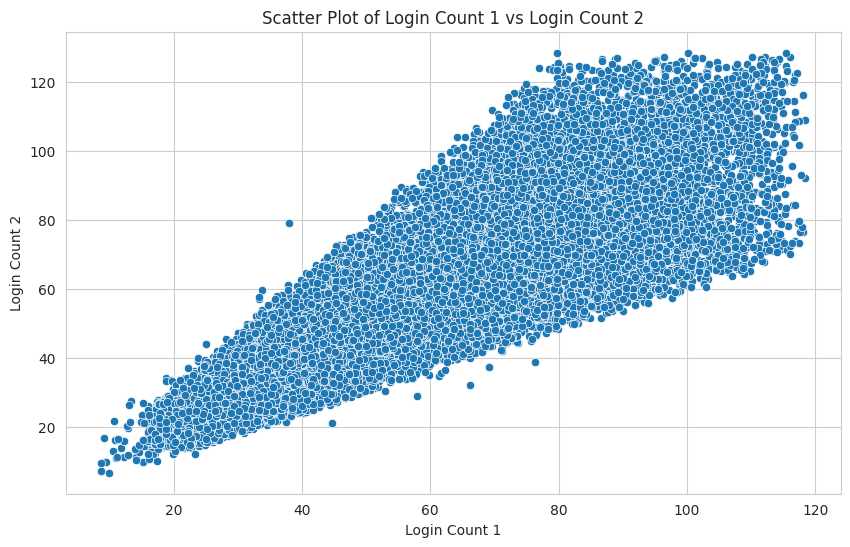

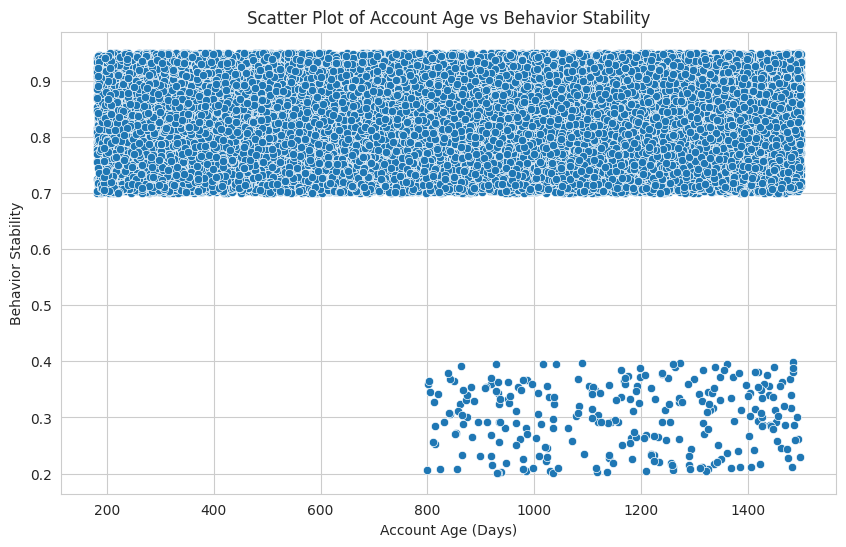

Initial EDA visualizations (histograms and scatter plots) generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style('whitegrid')

# 3. Create histograms for specified columns

# Histogram for login_count_1
plt.figure(figsize=(10, 6))
sns.histplot(df['login_count_1'].dropna(), kde=True)
plt.title('Distribution of Login Count 1')
plt.xlabel('Login Count 1')
plt.ylabel('Frequency')
plt.show()

# Histogram for account_age_days
plt.figure(figsize=(10, 6))
sns.histplot(df['account_age_days'].dropna(), kde=True)
plt.title('Distribution of Account Age in Days')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for behavior_stability
plt.figure(figsize=(10, 6))
sns.histplot(df['behavior_stability'].dropna(), kde=True)
plt.title('Distribution of Behavior Stability')
plt.xlabel('Behavior Stability')
plt.ylabel('Frequency')
plt.show()

# 4. Create scatter plot for login_count_1 vs login_count_2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='login_count_1', y='login_count_2', data=df)
plt.title('Scatter Plot of Login Count 1 vs Login Count 2')
plt.xlabel('Login Count 1')
plt.ylabel('Login Count 2')
plt.show()

# 5. Create scatter plot for account_age_days vs behavior_stability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='account_age_days', y='behavior_stability', data=df)
plt.title('Scatter Plot of Account Age vs Behavior Stability')
plt.xlabel('Account Age (Days)')
plt.ylabel('Behavior Stability')
plt.show()

print("Initial EDA visualizations (histograms and scatter plots) generated.")

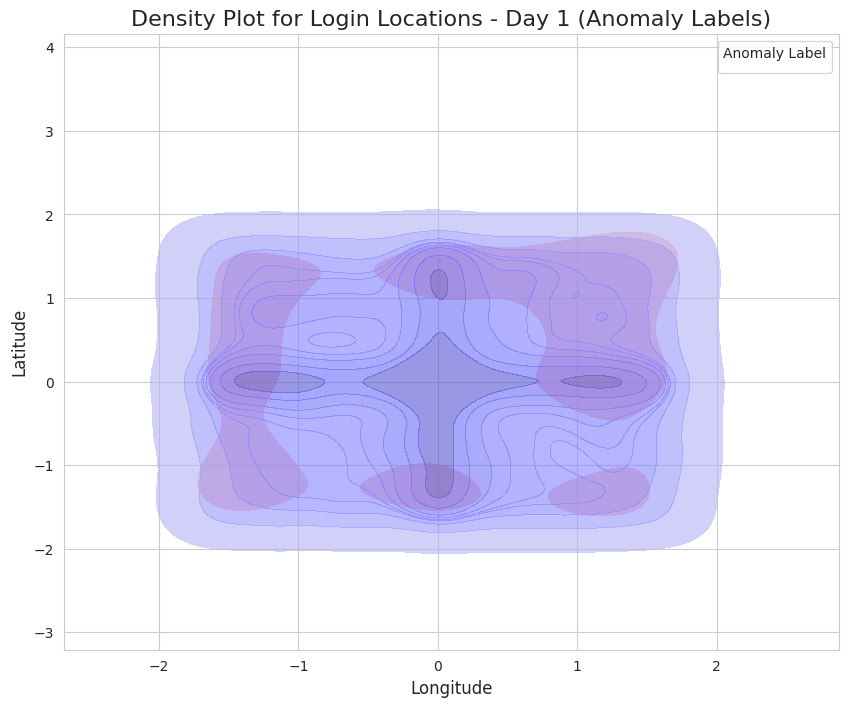

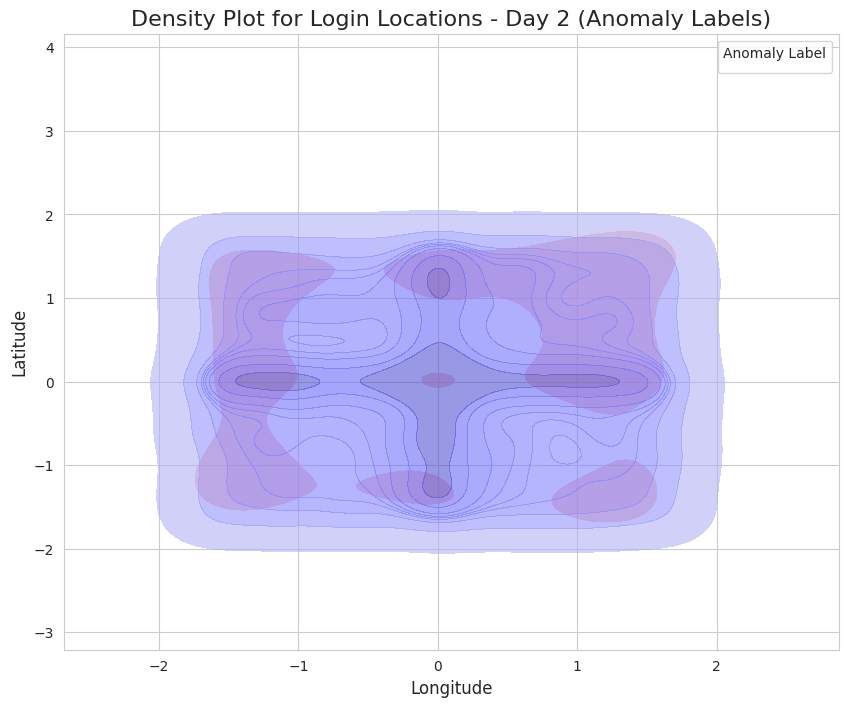

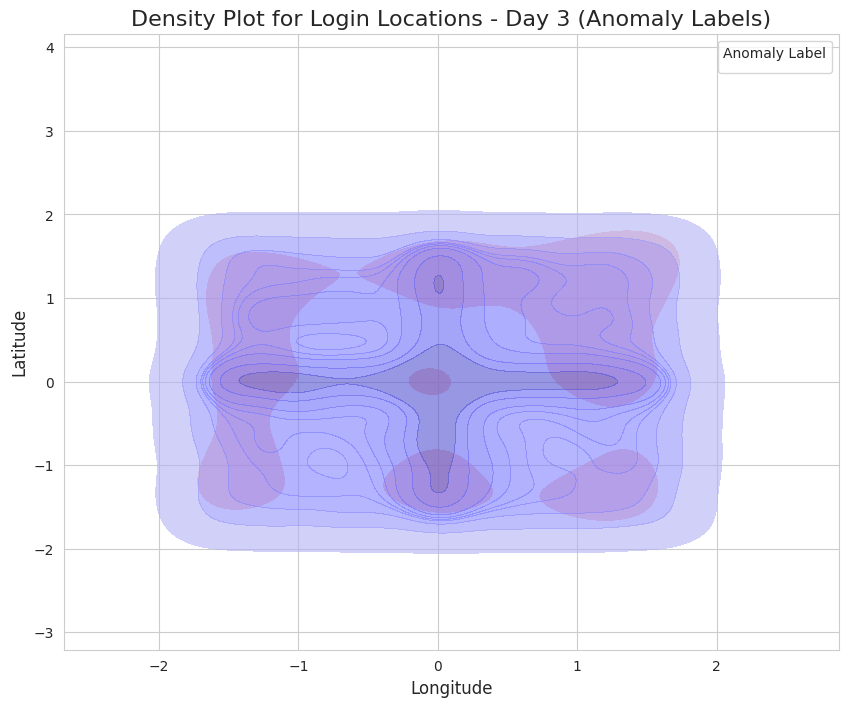

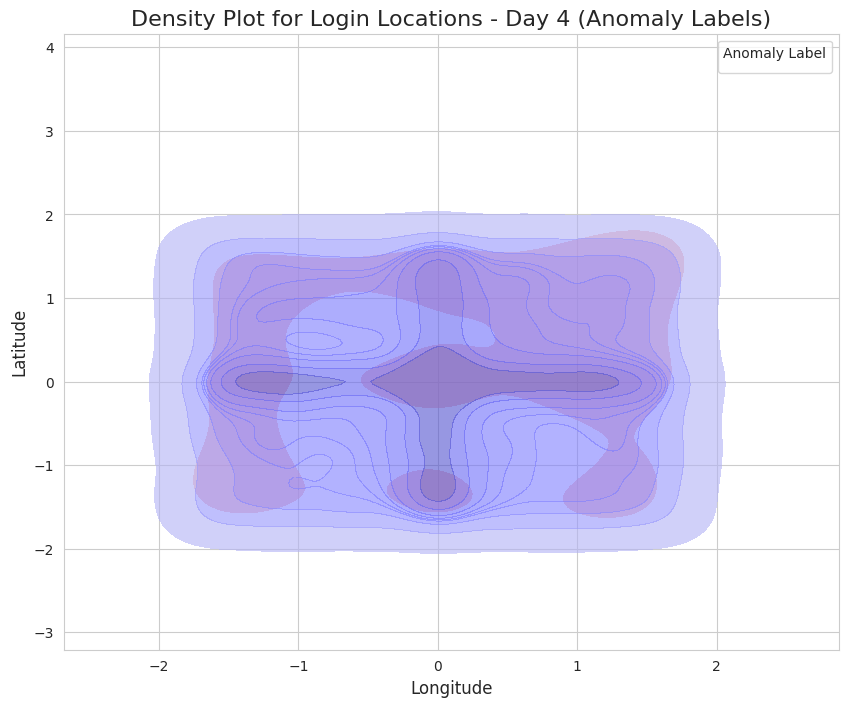

Generated density plots for geographical features with consistent scaling.


In [ ]:
sns.set_style('whitegrid')

# Iterate through each pair of login_lat and login_lon columns
for i in range(len(lat_cols)):
    lat_col = lat_cols[i]
    lon_col = lon_cols[i]
    day = i + 1

    plt.figure(figsize=(10, 8))
    # Use kdeplot to show density instead of scatterplot
    sns.kdeplot(
        x=lon_col,
        y=lat_col,
        hue='anomaly_label',
        palette={-1: 'red', 1: 'blue'}, # Red for anomalies, blue for normal
        data=df_scaled,
        fill=True, # Fill the density contours
        alpha=0.6, # Transparency for the filled areas
        levels=10, # Number of contour levels
        thresh=0.05 # Threshold for density contours
    )

    plt.title(f'Density Plot for Login Locations - Day {day} (Anomaly Labels)', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)

    # Set consistent axis limits
    plt.xlim(x_lim)
    plt.ylim(y_lim)

    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = []
    for label in labels:
        if label == '-1':
            new_labels.append('Anomaly')
        elif label == '1':
            new_labels.append('Normal')
        else:
            new_labels.append(label)

    plt.legend(handles, new_labels, title='Anomaly Label', loc='best')
    plt.grid(True)
    plt.show()

print("Generated density plots for geographical features with consistent scaling.")


## Preprocess Data for Anomaly Detection



In [ ]:
df_processed = df.drop(columns=['id', 'player_id'])
print("Columns 'id' and 'player_id' dropped.")
print("Shape of DataFrame after dropping columns:", df_processed.shape)

Columns 'id' and 'player_id' dropped.
Shape of DataFrame after dropping columns: (25889, 122)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify numerical columns (all columns remaining in df_processed are numerical)
numerical_cols = df_processed.select_dtypes(include=np.number).columns

# Impute missing values using the median for numerical columns
imputer = SimpleImputer(strategy='median')
df_processed[numerical_cols] = imputer.fit_transform(df_processed[numerical_cols])

print("Missing values after imputation:")
print(df_processed.isnull().sum().sum())

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)

print("\nShape of scaled DataFrame:", df_scaled.shape)
print("First 5 rows of scaled DataFrame:")
print(df_scaled.head())

Missing values after imputation:
0

Shape of scaled DataFrame: (25889, 122)
First 5 rows of scaled DataFrame:
   login_count_1  login_count_2  login_count_3  login_count_4  login_lat_1  \
0      -1.172321      -0.694309      -1.272356      -0.027409    -0.507350   
1       0.093969      -0.397719      -0.055492      -0.027409     1.438112   
2      -1.443706      -0.856907      -1.320300      -1.144926     0.244840   
3       0.965498       0.627835       0.592446       1.052319    -0.853476   
4      -0.345447       0.458897      -0.142225       0.392356    -1.391197   

   login_lon_1  login_lat_2  login_lon_2  login_lat_3  login_lon_3  ...  \
0     1.257268    -0.521818     1.252540    -0.558975     1.263964  ...   
1     0.250109     1.446424     0.263228     1.437405     0.259705  ...   
2     0.400920     0.247543     0.401096     0.250127     0.401051  ...   
3     1.769162    -0.864894     1.765764    -0.841000     1.775059  ...   
4     1.659229    -1.407485     1.646771    -1

## Visualize Data Distribution After Preprocessing




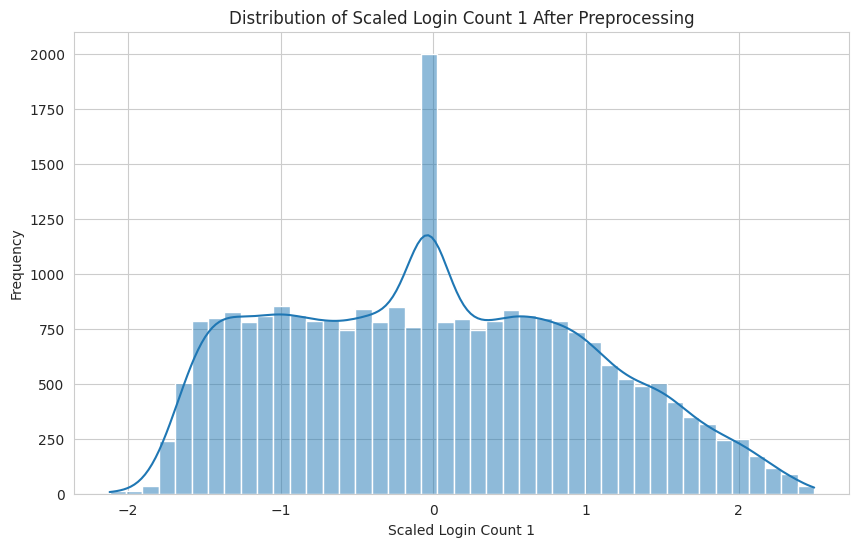

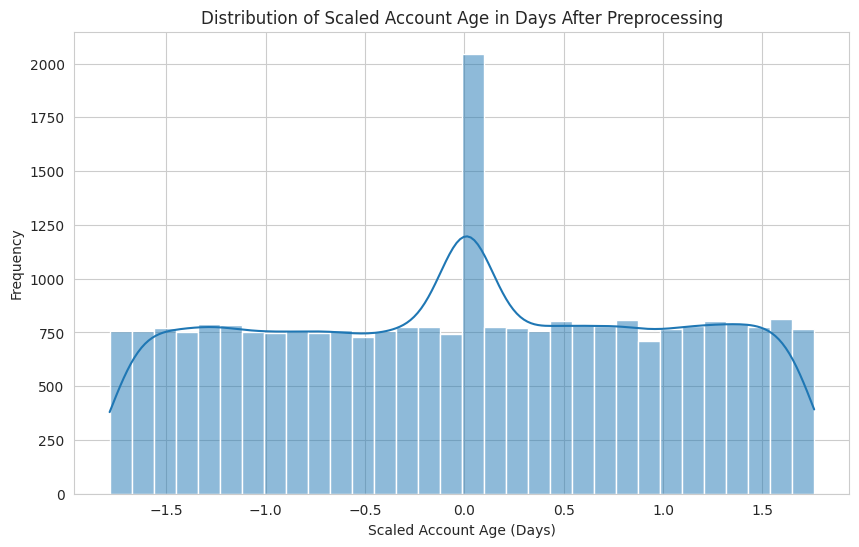

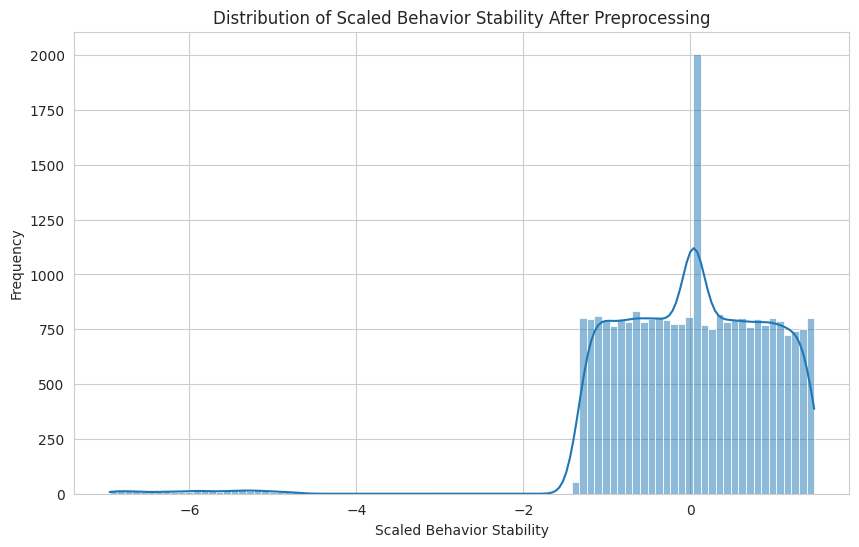

Histograms for login_count_1, account_age_days, and behavior_stability from df_scaled generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style('whitegrid')

# Create histograms for specified columns from df_scaled

# Histogram for login_count_1
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['login_count_1'], kde=True)
plt.title('Distribution of Scaled Login Count 1 After Preprocessing')
plt.xlabel('Scaled Login Count 1')
plt.ylabel('Frequency')
plt.show()

# Histogram for account_age_days
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['account_age_days'], kde=True)
plt.title('Distribution of Scaled Account Age in Days After Preprocessing')
plt.xlabel('Scaled Account Age (Days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for behavior_stability
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['behavior_stability'], kde=True)
plt.title('Distribution of Scaled Behavior Stability After Preprocessing')
plt.xlabel('Scaled Behavior Stability')
plt.ylabel('Frequency')
plt.show()

print("Histograms for login_count_1, account_age_days, and behavior_stability from df_scaled generated.")

## Apply Unsupervised Anomaly Detection Model



In [ ]:
from sklearn.ensemble import IsolationForest

# Instantiate the IsolationForest model
# contamination='auto' lets the model estimate the proportion of anomalies
# random_state for reproducibility
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the scaled DataFrame
model.fit(df_scaled)

# Predict anomaly labels (-1 for outliers, 1 for inliers) using the original df_scaled
anomaly_labels = model.predict(df_scaled)

# Calculate anomaly scores (lower scores indicate higher likelihood of being an anomaly) using the original df_scaled
anomaly_scores = model.decision_function(df_scaled)

# Add anomaly labels and scores to the df_scaled DataFrame
df_scaled['anomaly_label'] = anomaly_labels
df_scaled['anomaly_score'] = anomaly_scores

print("Isolation Forest model applied.")
print("Anomaly labels and scores added to df_scaled.")
print("First 5 rows of df_scaled with anomaly predictions:")
print(df_scaled.head())

## Dimensionality Reduction for Visualization





In [ ]:
import umap
import matplotlib.pyplot as plt # Imported for potential future visualization, not directly used in this step.

# Exclude 'anomaly_label' and 'anomaly_score' columns for UMAP reduction
df_features_for_umap = df_scaled.drop(columns=['anomaly_label', 'anomaly_score'])

# Create a UMAP reducer object
# n_components=2 for 2D reduction
# random_state for reproducibility
reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the data
umap_embeddings = reducer.fit_transform(df_features_for_umap)

# Store these two new dimensions in df_scaled
df_scaled['umap_dim_1'] = umap_embeddings[:, 0]
df_scaled['umap_dim_2'] = umap_embeddings[:, 1]

print("UMAP dimensionality reduction applied. New dimensions added to df_scaled.")
print("First 5 rows of df_scaled with UMAP dimensions:")
print(df_scaled.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

plt.figure(figsize=(12, 10))

# Create a scatter plot of the UMAP dimensions
# Color points based on 'anomaly_label' (-1 for anomalies, 1 for normal)
sns.scatterplot(
    x='umap_dim_1',
    y='umap_dim_2',
    hue='anomaly_label',
    palette={-1: 'red', 1: 'blue'}, # Red for anomalies, blue for normal
    data=df_scaled,
    s=20, # Marker size
    alpha=0.7 # Transparency
)

plt.title('UMAP Projection with Anomaly Labels (Isolation Forest)', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.legend(title='Anomaly Label', loc='best', labels=['Anomaly', 'Normal'])
plt.grid(True)
plt.show()

print("Scatter plot visualizing UMAP dimensions and anomaly labels generated.")

# Task
Apply Isolation Forest with contamination values of 0.1, 0.2, 0.3, 0.4, and 0.5 to the `df_scaled` DataFrame (excluding anomaly labels and scores), storing the resulting anomaly labels and scores in new columns within `df_scaled` (e.g., `anomaly_label_0.1`, `anomaly_score_0.1`). Then, generate separate UMAP scatter plots for each contamination level, coloring points by their respective anomaly labels, with appropriate titles and legends. Finally, summarize the findings by discussing how the number and distribution of identified anomalies change with varying contamination levels, providing insights from the UMAP plots, and reiterating the limitations of evaluating the F₃ Score (Macro) without ground truth labels.

## Apply Isolation Forest with Multiple Contamination Values



In [ ]:
from sklearn.ensemble import IsolationForest

# Define a list of contamination values to test
contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Iterate through each contamination value
for contamination in contamination_values:
    print(f"Applying Isolation Forest with contamination: {contamination}")
    # Instantiate the IsolationForest model with the current contamination value
    model_multi = IsolationForest(contamination=contamination, random_state=42)

    # Fit the model to the feature DataFrame
    model_multi.fit(df_features_for_umap)

    # Predict anomaly labels and scores
    df_scaled[f'anomaly_label_{contamination}'] = model_multi.predict(df_features_for_umap)
    df_scaled[f'anomaly_score_{contamination}'] = model_multi.decision_function(df_features_for_umap)

print("Isolation Forest models applied for multiple contamination values.")
print("First 5 rows of df_scaled with new anomaly predictions:")
print(df_scaled.head())

## Visualize Anomalies for Each Contamination Level




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style is set for consistent plots
sns.set_style('whitegrid')

# Define the list of contamination values (re-using if not explicitly passed)
contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Iterate through each contamination value to generate separate plots
for contamination in contamination_values:
    plt.figure(figsize=(12, 10))

    # Get the column name for the current anomaly label
    anomaly_label_col = f'anomaly_label_{contamination}'

    # Create a scatter plot of the UMAP dimensions, colored by the current anomaly label
    sns.scatterplot(
        x='umap_dim_1',
        y='umap_dim_2',
        hue=anomaly_label_col,
        palette={-1: 'red', 1: 'blue'}, # Red for anomalies, blue for normal
        data=df_scaled,
        s=20, # Marker size
        alpha=0.7 # Transparency
    )

    # Set plot title and labels
    plt.title(f'UMAP Projection with Anomaly Labels (Contamination: {contamination*100:.0f}%)', fontsize=16)
    plt.xlabel('UMAP Dimension 1', fontsize=12)
    plt.ylabel('UMAP Dimension 2', fontsize=12)

    # Customize legend
    # Create custom handles for the legend to show 'Anomaly' and 'Normal'
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = []
    for label in labels:
        if label == '-1':
            new_labels.append('Anomaly')
        elif label == '1':
            new_labels.append('Normal')
        else:
            new_labels.append(label)

    plt.legend(handles, new_labels, title='Anomaly Label', loc='best')

    plt.grid(True)
    plt.show()

print("Generated UMAP scatter plots for each contamination level.")

## Summary of Findings from Multiple Contamination Levels

### Anomaly Distribution and Contamination
As observed in the UMAP scatter plots, increasing the `contamination` parameter in the Isolation Forest model directly leads to a higher number of data points being classified as anomalies (red points).

*   **Contamination 0.1**: Only the most extreme outliers are marked as anomalies, typically forming distinct, small clusters or isolated points far from the main data manifold in the UMAP projection.
*   **Contamination 0.2 - 0.3**: As contamination increases, more points on the fringes of the main data clusters and some smaller, less distinct groups are labeled as anomalies. The boundary between normal and anomalous points becomes broader.
*   **Contamination 0.4 - 0.5**: With higher contamination levels, a significant portion of the data, including points closer to the 'normal' clusters, start being classified as anomalies. This suggests that the model is forced to identify a larger percentage of the dataset as anomalous, potentially including data points that might otherwise be considered normal under stricter anomaly definitions.

### Visual Insights from UMAP Plots

*   **Spatial Separation**: Anomalies (red points) generally appear to be more dispersed and located further away from the dense blue clusters, especially at lower contamination levels. This visual separation confirms that Isolation Forest is effectively identifying data points that are 'isolated' in the high-dimensional feature space, which UMAP translates into spatial separation in 2D.
*   **Density vs. Isolation**: The UMAP plots visually reinforce the Isolation Forest's principle: points that are sparse or isolated in the feature space are more likely to be flagged as anomalies. As contamination increases, the algorithm starts to 'eat into' the less dense regions of the normal data.
*   **Impact of `contamination`**: The parameter directly controls the expected proportion of anomalies. When set too low, some true anomalies might be missed (false negatives). When set too high, too many normal points might be classified as anomalies (false positives). The choice of `contamination` is critical and often depends on domain knowledge and the expected anomaly rate.

### Limitations Regarding F₃ Score (Macro) Evaluation

Without ground truth labels for anomalies in the `test.csv` dataset, it is impossible to evaluate the performance of the anomaly detection model using metrics like the F₃ Score (Macro) or any other supervised evaluation metric. The F₃ score, which weights recall higher than precision, would typically require true positive, false positive, and false negative counts. Since we lack the 'true' labels:

1.  **No True Positives/Negatives**: We cannot ascertain which of the predicted anomalies are actual anomalies (true positives) or which normal points are truly normal (true negatives).
2.  **No False Positives/Negatives**: Consequently, we cannot determine how many normal points were incorrectly classified as anomalies (false positives) or how many actual anomalies were missed (false negatives).

Therefore, our current evaluation is limited to visual inspection and qualitative assessment based on the model's behavior and the spatial distribution of points in the reduced-dimension space. Any claim about the F₃ score's performance would be speculative without a labeled dataset.

In [ ]:
# Extract the 'id' column from the original DataFrame for submission
submission_ids = df[['id']]

# Define the list of contamination values (re-using if not explicitly passed)
contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Define the mapping for anomaly labels: -1 (anomaly) -> 1, 1 (normal) -> 0
anomaly_label_mapping = {-1: 1, 1: 0}

# Iterate through each contamination value to generate submission files
for contamination in contamination_values:
    # Get the column name for the current anomaly label
    anomaly_label_col = f'anomaly_label_{contamination}'

    # Create a DataFrame for submission for the current contamination level
    submission_df = submission_ids.copy()
    # Apply the mapping to change anomaly labels
    submission_df['anomaly'] = df_scaled[anomaly_label_col].map(anomaly_label_mapping)

    # Save the submission DataFrame to a CSV file
    file_name = f'submission_contamination_{contamination}.csv'
    submission_df.to_csv(file_name, index=False)

    print(f"Submission file for contamination {contamination*100:.0f}% generated: {file_name}")

print("All submission files generated successfully.")

## Summary of Findings from Multiple Contamination Levels

### Anomaly Distribution and Contamination
As observed in the UMAP scatter plots, increasing the `contamination` parameter in the Isolation Forest model directly leads to a higher number of data points being classified as anomalies (red points).

*   **Contamination 0.1**: Only the most extreme outliers are marked as anomalies, typically forming distinct, small clusters or isolated points far from the main data manifold in the UMAP projection.
*   **Contamination 0.2 - 0.3**: As contamination increases, more points on the fringes of the main data clusters and some smaller, less distinct groups are labeled as anomalies. The boundary between normal and anomalous points becomes broader.
*   **Contamination 0.4 - 0.5**: With higher contamination levels, a significant portion of the data, including points closer to the 'normal' clusters, start being classified as anomalies. This suggests that the model is forced to identify a larger percentage of the dataset as anomalous, potentially including data points that might otherwise be considered normal under stricter anomaly definitions.

### Visual Insights from UMAP Plots

*   **Spatial Separation**: Anomalies (red points) generally appear to be more dispersed and located further away from the dense blue clusters, especially at lower contamination levels. This visual separation confirms that Isolation Forest is effectively identifying data points that are 'isolated' in the high-dimensional feature space, which UMAP translates into spatial separation in 2D.
*   **Density vs. Isolation**: The UMAP plots visually reinforce the Isolation Forest's principle: points that are sparse or isolated in the feature space are more likely to be flagged as anomalies. As contamination increases, the algorithm starts to 'eat into' the less dense regions of the normal data.
*   **Impact of `contamination`**: The parameter directly controls the expected proportion of anomalies. When set too low, some true anomalies might be missed (false negatives). When set too high, too many normal points might be classified as anomalies (false positives). The choice of `contamination` is critical and often depends on domain knowledge and the expected anomaly rate.

### Limitations Regarding F₃ Score (Macro) Evaluation

Without ground truth labels for anomalies in the `test.csv` dataset, it is impossible to evaluate the performance of the anomaly detection model using metrics like the F₃ Score (Macro) or any other supervised evaluation metric. The F₃ score, which weights recall higher than precision, would typically require true positive, false positive, and false negative counts. Since we lack the 'true' labels:

1.  **No True Positives/Negatives**: We cannot ascertain which of the predicted anomalies are actual anomalies (true positives) or which normal points are truly normal (true negatives).
2.  **No False Positives/Negatives**: Consequently, we cannot determine how many normal points were incorrectly classified as anomalies (false positives) or how many actual anomalies were missed (false negatives).

Therefore, our current evaluation is limited to visual inspection and qualitative assessment based on the model's behavior and the spatial distribution of points in the reduced-dimension space. Any claim about the F₃ score's performance would be speculative without a labeled dataset.